In [1]:
from cvx.stat_arb.ccp import *
from utils import *
import seaborn as sns

sns.set()
sns.set(font_scale=1.5)

%load_ext autoreload
%autoreload 2

In [99]:
match_fractions = []

for res in results:
    stat_arb = res.stat_arb

    match_fractions.append(matching_sector(stat_arb))



In [74]:
indices = means.sort_values(ascending=False).index[500:]

match_fractions2 = []

for ind in indices:
    res = results[ind]
    stat_arb = res.stat_arb

    match_fractions2.append(matching_sector(stat_arb))

In [75]:
np.mean(match_fractions2)

0.515285265049416

In [65]:
np.mean(match_fractions)

0.5261135634028893

In [59]:
for index in means.sort_values(ascending=False).tail(10).index:
    stat_arb = results[index].stat_arb
    stat_arb_names(stat_arb)

    print("\n")


INTEL CORP, Manufacturing
BERKSHIRE HATHAWAY INC DEL, Finance and Insurance
MASTERCARD INC, Professional, Scientific, and Technical Services
TEVA PHARMACEUTICAL INDS LTD, Manufacturing
CELGENE CORP, Professional, Scientific, and Technical Services
NORFOLK SOUTHERN CORP, Transportation and Warehousing


AMAZON COM INC, Retail Trade
ALTABA INC, Professional, Scientific, and Technical Services
MARRIOTT INTERNATIONAL INC NEW, Accommodation and Food Services
T I M PARTICIPACOES S A, Information
PHILLIPS 66, Manufacturing


MICROSOFT CORP, Information
EXXON MOBIL CORP, Manufacturing
INTEL CORP, Manufacturing
TORONTO DOMINION BANK ONT, Finance and Insurance
GENERAL ELECTRIC CO, Manufacturing
NORFOLK SOUTHERN CORP, Transportation and Warehousing


BERKSHIRE HATHAWAY INC DEL, Finance and Insurance
MASTERCARD INC, Professional, Scientific, and Technical Services
TEVA PHARMACEUTICAL INDS LTD, Manufacturing
CELGENE CORP, Professional, Scientific, and Technical Services


INTEL CORP, Manufacturing


In [47]:
means[index]

1.0269827052012885

WELLS FARGO & CO NEW
CITIGROUP INC
MASTERCARD INC
DEUTSCHE BANK A G
PRECISION CASTPARTS CORP


In [2]:
prices_full = pd.read_csv("../data/stock_prices.csv", index_col=0, parse_dates=True)
market_cap = pd.read_csv("../data/market_cap.csv", index_col=0, parse_dates=True)
spreads = pd.read_csv("../data/spreads_stocks.csv", index_col=0, parse_dates=True)

In [3]:
results, portfolios = run_backtest(
    prices_full,
    market_cap,
    spreads,
    P_max=100,
    moving_mean=True,
    T_max=125,
)

8% 16% 24% 32% 40% 48% 56% 64% 72% 80% 88% 96% 
Finished after 127 iterations


# Stat arb statistics

Total number of (potential) SAs found: 1270
Average number of assets per SA: 5.3
Median number of assets per SA: 5.0
Total number of validated SAs: 712
max: 10
min: 1


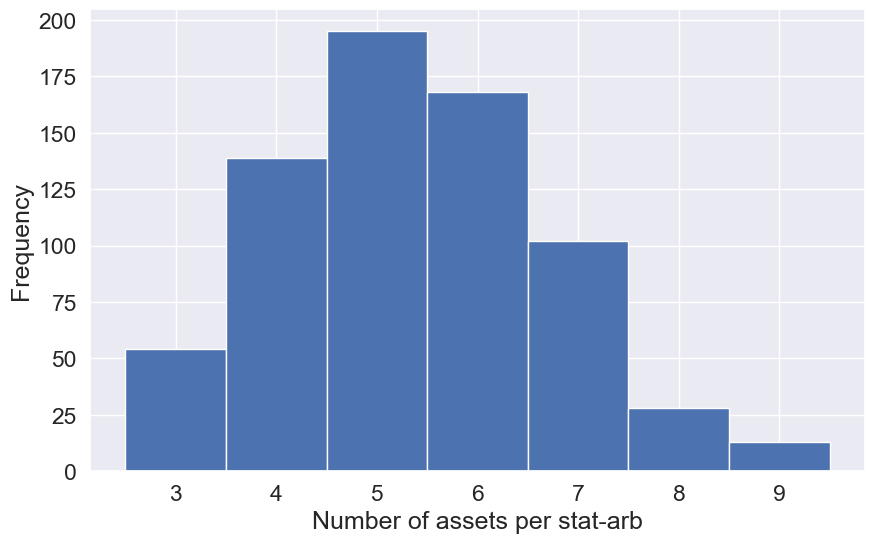

In [5]:
### How many assets per SA on average
lens = []
n_stat_arbs = 0

for res in results:
    stat_arb = res.stat_arb
    lens.append(stat_arb.stocks.shape[0])
    n_stat_arbs += 1

iterations=127
K=10
print(f"Total number of (potential) SAs found: {iterations*K}")
print(f"Average number of assets per SA: {np.mean(lens):.1f}")
print(f"Median number of assets per SA: {np.median(lens):.1f}")
print(f"Total number of validated SAs: {n_stat_arbs}")
print(f"max: {np.max(lens)}")
print(f"min: {np.min(lens)}")
plt.hist(lens, bins=np.arange(2.5, 10.5, 1));
plt.xlabel("Number of assets per stat-arb")
plt.ylabel("Frequency");


### Profits after transaction costs

In [6]:
all_traded_assets = []

for portfolio in portfolios:
    all_traded_assets += portfolio.stocks.columns.tolist()
all_traded_assets = list(set(all_traded_assets))

trading_cost_model=SpreadCostModel(spreads[all_traded_assets])


portfolios_after_cost = []

levs = []
for i, portfolio in enumerate(portfolios):
    res = results[i]
    portfolios_after_cost.append(
        simulate(res, portfolio, trading_cost_model, 0.5)
    )



Portfolio went bust at 2013-01-18 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03-16 00:00:00
bust_sort: 1

Portfolio went bust at 2021-10-12 00:00:00
bust_sort: 1


In [7]:
stat_arb_metrics = metrics(portfolios_after_cost, results)

100%|██████████| 712/712 [00:38<00:00, 18.34it/s]


In [9]:
avg_lens = np.mean(lens)
median_len = np.median(lens)
n_unique_stat_arbs = n_stat_arbs

means = stat_arb_metrics.means
stdevs = stat_arb_metrics.stdevs
sharpes = stat_arb_metrics.sharpes
profits = stat_arb_metrics.profits
min_navs = stat_arb_metrics.min_navs
min_cum_prof = stat_arb_metrics.min_cum_prof
drawdowns = stat_arb_metrics.drawdowns

print(f"Average number of assets per SA: {avg_lens:.1f}")
print(f"Median number of assets per SA: {median_len:.1f}")
print(f"Number of unique SAs: {n_unique_stat_arbs}")
print(f"Mean profit: {profits.mean():.2f}")
print(f"Median profit: {profits.median():.2f}")
print(f"Std profit: {profits.std():.2f}")
print(f"75th percentile: {profits.quantile(0.75):.2f}")
print(f"25th percentile: {profits.quantile(0.25):.2f}")
print(f"Fraction profitable: {(profits > 0).mean():.2f}")
print(f"Average minimum cumulative profit: {min_cum_prof.mean():.2f}")

print("\nMean return")
print(f"Mean return: {means.mean():.2f}")
print(f"Median return: {means.median():.2f}")
# print(f"Std return: {means.std():.2f}")
print(f"75th percentile return: {means.quantile(0.75):.2f}")
print(f"25th percentile return: {means.quantile(0.25):.2f}")
print(f"Fraction positive: {(means > 0).mean():.2f}")


print("\nRisk")
print(f"Mean risk: {stdevs.mean():.2f}")
print(f"Median risk: {stdevs.median():.2f}")
# print(f"Std risk: {stdevs.std():.2f}")
print(f"75th percentile risk: {stdevs.quantile(0.75):.2f}")
print(f"25th percentile risk: {stdevs.quantile(0.25):.2f}")

print("\nSharpe")
print(f"Average Sharpe: {sharpes.mean():.2f}")
print(f"Median Sharpe: {sharpes.median():.2f}")
# print(f"Std Sharpe: {sharpes.std():.2f}")
print(f"75th percentile Sharpe: {sharpes.quantile(0.75):.2f}")
print(f"25th percentile Sharpe: {sharpes.quantile(0.25):.2f}")
print(f"Fraction positive: {(sharpes > 0).mean():.2f}")

print("\nDrawdown")
print(f"Mean drawdown: {drawdowns.mean():.2f}")
print(f"Median drawdown: {drawdowns.median():.2f}")
# print(f"Std drawdown: {drawdowns.std():.2f}")
print(f"75th percentile drawdown: {drawdowns.quantile(0.75):.2f}")
print(f"25th percentile drawdown: {drawdowns.quantile(0.25):.2f}")


Average number of assets per SA: 5.3
Median number of assets per SA: 5.0
Number of unique SAs: 712
Mean profit: 1.10
Median profit: 0.80
Std profit: 3.01
75th percentile: 2.05
25th percentile: -0.24
Fraction profitable: 0.70
Average minimum cumulative profit: -1.76

Mean return
Mean return: 0.15
Median return: 0.12
75th percentile return: 0.24
25th percentile return: 0.03
Fraction positive: 0.81

Risk
Mean risk: 0.20
Median risk: 0.15
75th percentile risk: 0.25
25th percentile risk: 0.09

Sharpe
Average Sharpe: 0.84
Median Sharpe: 0.88
75th percentile Sharpe: 1.52
25th percentile Sharpe: 0.21
Fraction positive: 0.81

Drawdown
Mean drawdown: 0.11
Median drawdown: 0.09
75th percentile drawdown: 0.15
25th percentile drawdown: 0.05


### Number of active stat arbs

In [10]:
times = prices_full.index
n_active = pd.Series(index=times, data=0)

for res in results:
    entry_date = res.metrics.entry_date
    exit_date = res.metrics.exit_date

    n_active.loc[entry_date:exit_date].iloc[:-1] += 1

n_active = n_active[n_active > 0]

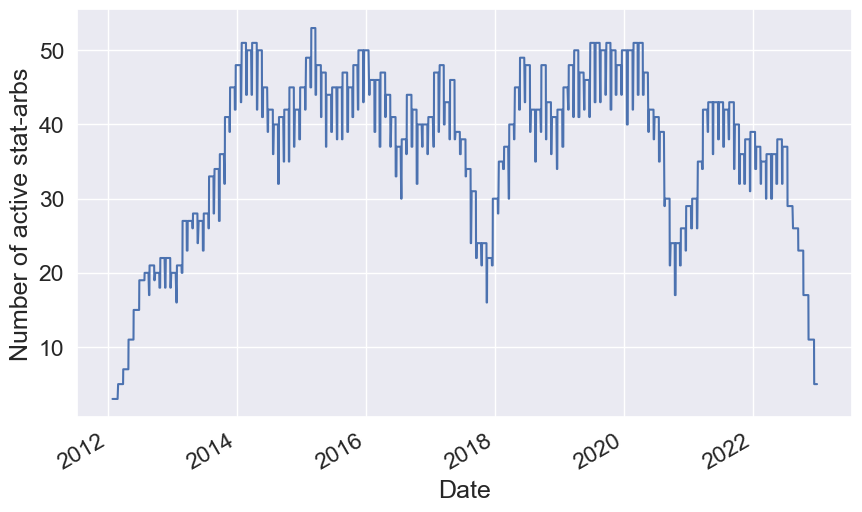

In [11]:
n_active.plot();
plt.ylabel("Number of active stat-arbs");
plt.xlabel("Date");

In [12]:
print(f"Average number of active stat arbs: {n_active.mean():.2f}")
print(f"Median number of active stat arbs: {n_active.median():.2f}")
print(f"Maximum number of active stat arbs: {n_active.max():.2f}")
print(f"Minimum number of active stat arbs: {n_active.min():.2f}")

Average number of active stat arbs: 37.13
Median number of active stat arbs: 40.00
Maximum number of active stat arbs: 53.00
Minimum number of active stat arbs: 3.00


### Example stat arbs

In [48]:
quantile_low = 0.16
quantile_high = 0.715
quantiles = means.quantile([quantile_low, quantile_high])
quantiles

0.160   -0.024499
0.715    0.216037
Name: means, dtype: float64

stat-arb:  -0.4×21178+0.1×13447+1.7×77274+0.3×12084
profit:  -0.08311259595915879
exit trigger:  2021-09-16 00:00:00


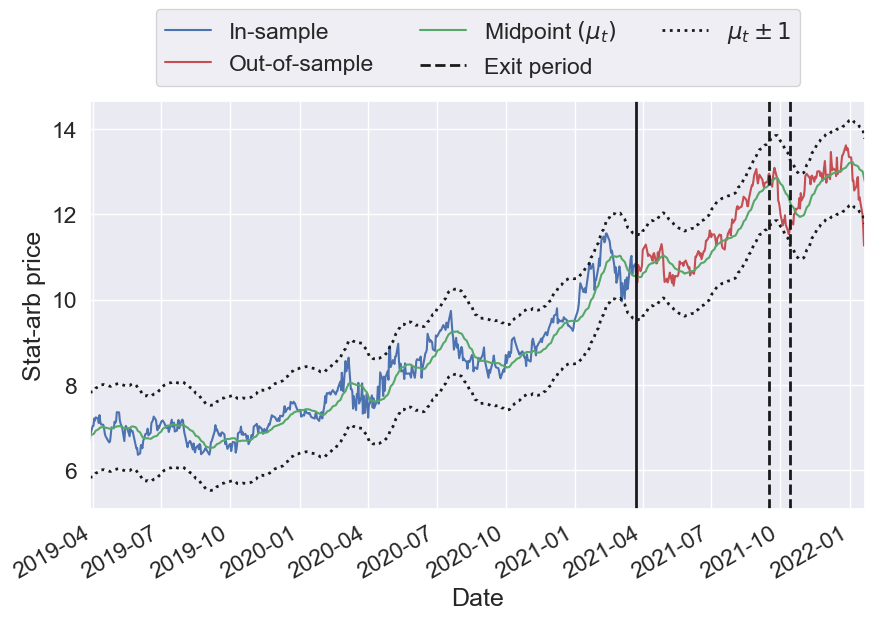

<Figure size 500x500 with 0 Axes>

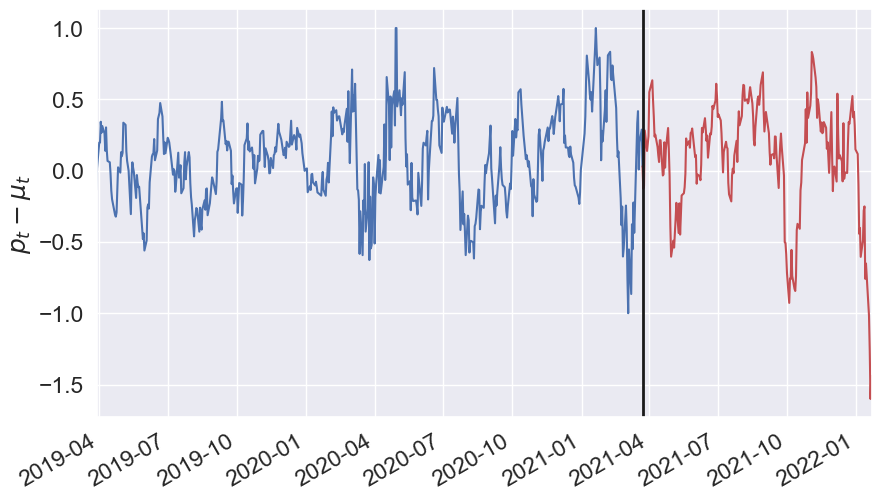

fsdfdds 2021-03-22 00:00:00
fsdfdds 2021-03-23 00:00:00
fdaadadsad -0.4511455643512697
2111 -0.4511455643512697


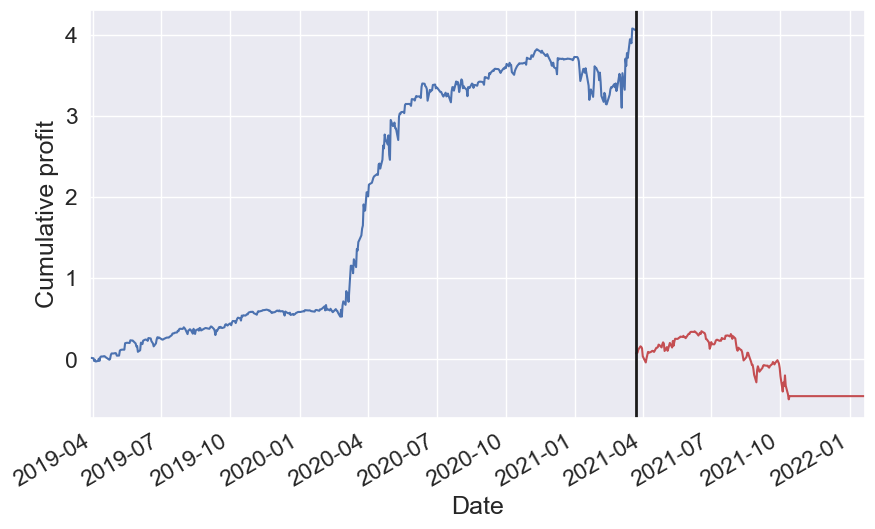

In [49]:
res_low = results[means[(means-quantiles[quantile_low]).abs().argsort()[:1]].index[0]]
plot_stat_arb(res_low, insample_bound=1, outsample_bound=np.inf, spreads=spreads);

stat-arb:  -8.9×69032+5.5×88668-2.8×19502+6.6×89071+2.7×75241
profit:  3.19492245046667
exit trigger:  2014-05-23 00:00:00


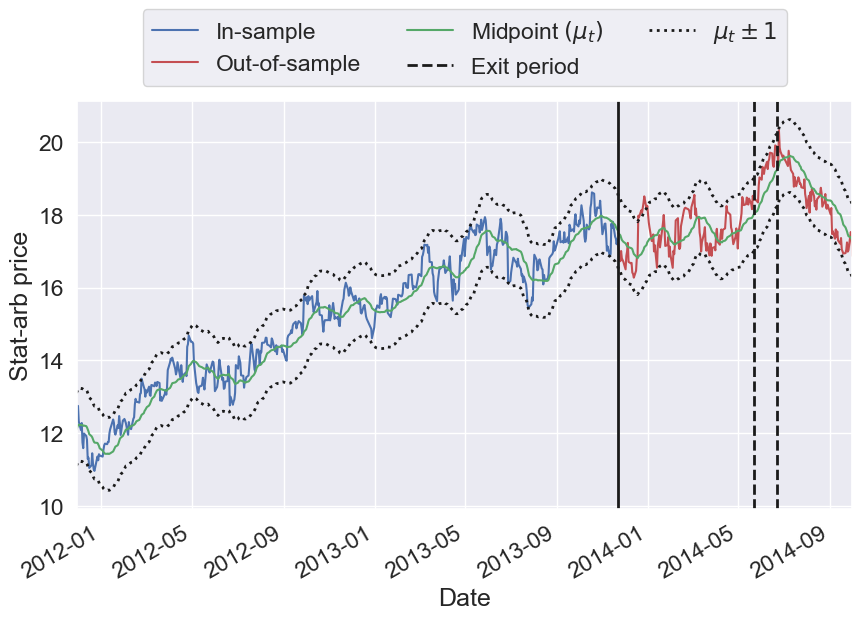

<Figure size 500x500 with 0 Axes>

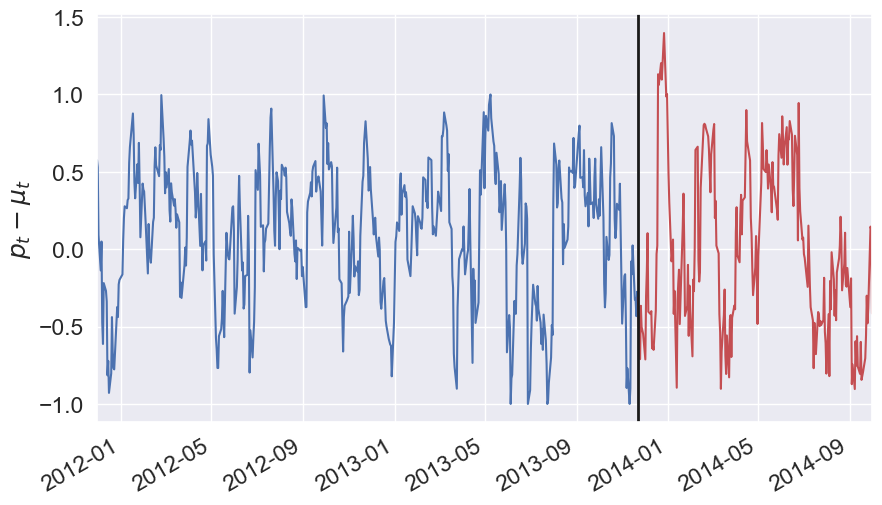

fsdfdds 2013-11-21 00:00:00
fsdfdds 2013-11-22 00:00:00
fdaadadsad 2.2635218226025917
2111 2.2635218226025917


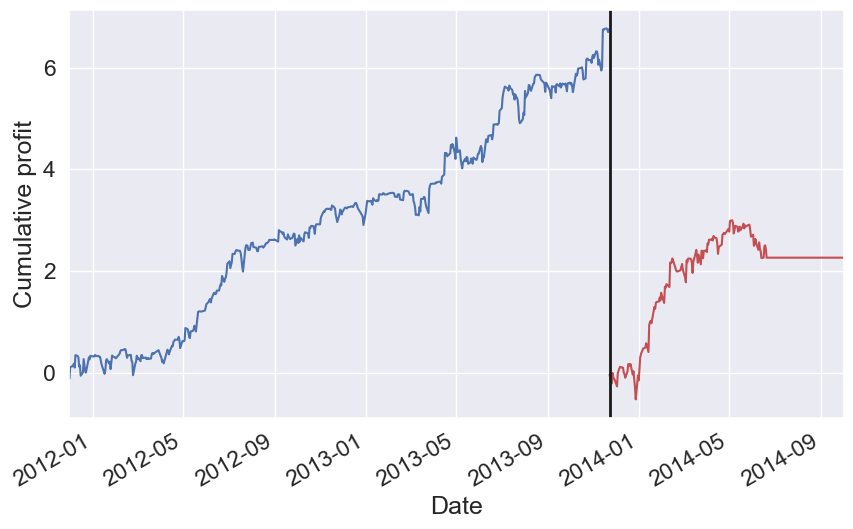

In [51]:
quantile_high = 0.715
quantiles = means.quantile([quantile_low, quantile_high])

res_high = results[means[(means-quantiles[quantile_high]).abs().argsort()[:1]].index[0]]
plot_stat_arb(res_high, insample_bound=1, outsample_bound=np.inf, spreads=spreads);